In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [9]:
df.shape

(100000, 9)

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()

unique_values = df['gender'].unique()
print(unique_values)

df['gender'] = encoder.fit_transform(df['gender'])

['Female' 'Male' 'Other']


In [26]:
unique_values1 = df['smoking_history'].unique()
print(unique_values1)

df['smoking_history'] = encoder.fit_transform(df['smoking_history'])

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [27]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [29]:
corr1 = df.corr()
corr1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


<Axes: >

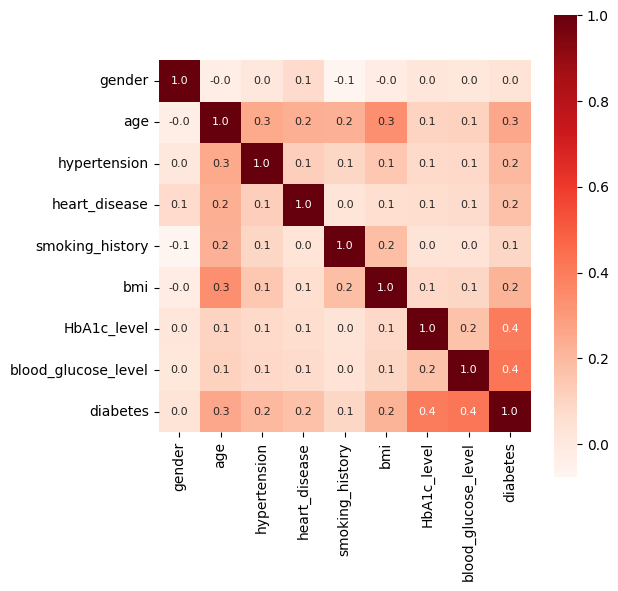

In [30]:
plt.figure(figsize=(6,6))
sns.heatmap(corr1,annot=True,cmap='Reds',cbar=True,square=True,fmt='.1f',annot_kws={'size':8})

In [32]:
df.groupby('diabetes').mean()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,0.409038,40.115187,0.058984,0.029235,2.125344,26.887163,5.396761,132.852470
1,0.475176,60.946588,0.245647,0.149059,2.764235,31.988382,6.934953,194.094706


In [33]:
X = df.drop(columns='diabetes',axis=1)
Y = df['diabetes']

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=2)
print(xtrain.shape,xtest.shape,X.shape)

(80000, 8) (20000, 8) (100000, 8)


Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model1 = RandomForestClassifier(n_estimators=70,random_state=22)
model1.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=70, random_state=22)

In [39]:
test_predict1 = model1.predict(xtest)
test_accuracy1 = accuracy_score(test_predict1,ytest)
test_accuracy1

0.9679

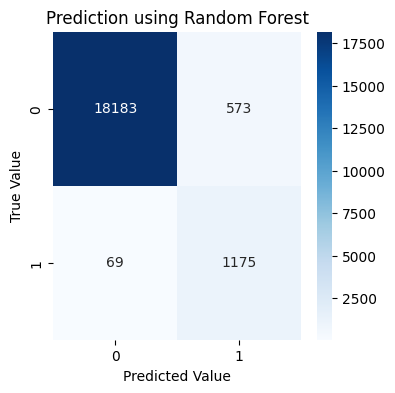

In [44]:
cm = confusion_matrix(test_predict1,ytest)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title('Prediction using Random Forest')
plt.show()

KNN Classifers

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model2 = KNeighborsClassifier()
model2.fit(xtrain,ytrain)

KNeighborsClassifier()

In [50]:
test_predict2 = model2.predict(xtest)
test_accuracy2 = accuracy_score(test_predict2,ytest)
test_accuracy2

0.95

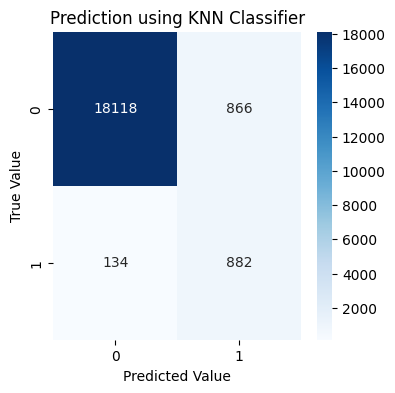

In [46]:
cm = confusion_matrix(test_predict2,ytest)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Prediction using KNN Classifier')
plt.show()